In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import plotly.express as px
import scipy
from skimage import color, exposure, measure, morphology, util
from segmentflow import segment, view
%load_ext autoreload
%autoreload 2

## Load images

Loading images...
--> Images loaded as 3D array:  (1016, 1024, 1004)
Plotting images: [250, 500, 750]


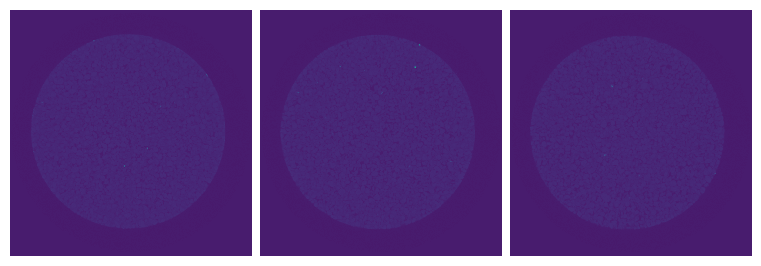

In [2]:
imgs_path = Path('../data/F67tiff')
slices = [250, 500, 750]
imgs = segment.load_images(
    imgs_path,
    slice_crop=None,
    convert_to_float=True,
    file_suffix='.tiff'
)
fig, axes = view.plot_slices(
    imgs,
    slices=slices,
    print_slices=True,
    imgs_per_row=None,
    fig_w=7.5,
    dpi=100
)

In [3]:
imgs_med = segment.preprocess(imgs, median_filter=True)

Preprocessing images...
--> Applying median filter...
--> Preprocessing complete


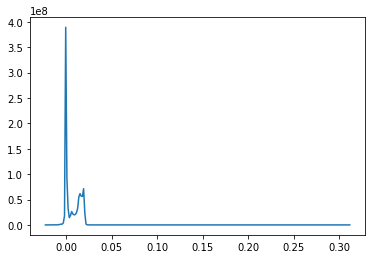

In [4]:
med_hist, med_bins_centers = exposure.histogram(imgs_med)
fig, ax = plt.subplots()
ax.plot(med_bins_centers, med_hist)

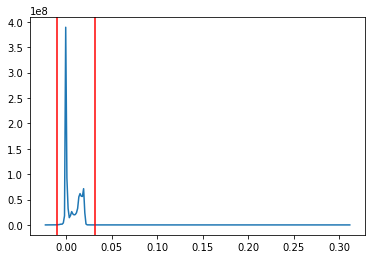

In [5]:
p0x01 = np.percentile(imgs_med, 0.01)
p99x99 = np.percentile(imgs_med, 99.99)
fig, ax = plt.subplots()
ax.plot(med_bins_centers, med_hist)
ax.axvline(p0x01, c='red')
ax.axvline(p99x99, c='red')
plt.show()

## Rescale intensity

Preprocessing images...
--> Rescaling intensities to percentile range [0.01, 99.99]...
--> Preprocessing complete
Plotting images: [250, 500, 750]


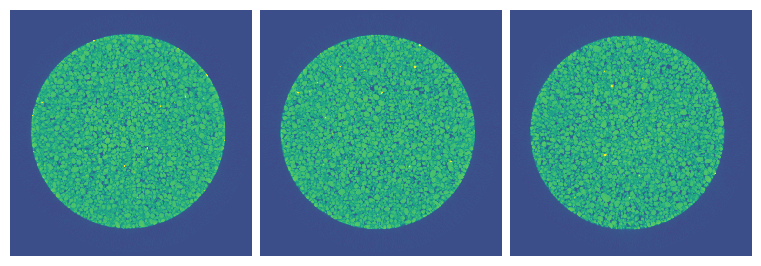

In [6]:
imgs_res = segment.preprocess(imgs_med, rescale_intensity_range=[0.01, 99.99])
fig, axes = view.plot_slices(
    imgs_res,
    slices=slices,
    print_slices=True,
    imgs_per_row=None,
    fig_w=7.5,
    dpi=100
)

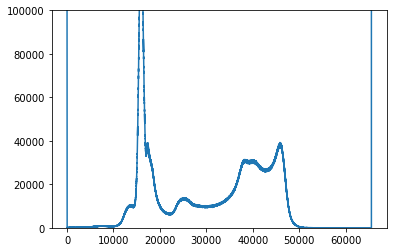

In [7]:
hist, bins_centers = exposure.histogram(imgs_res)
fig, ax = plt.subplots()
ax.plot(bins_centers, hist)
ax.set_ylim([0, 1e5])
plt.show()

Calculating thresholds from local minima...
--> 4 peak(s) found: [15947, 25559, 39540, 44782]
--> 3 minima found: [22063, 29928, 42598]


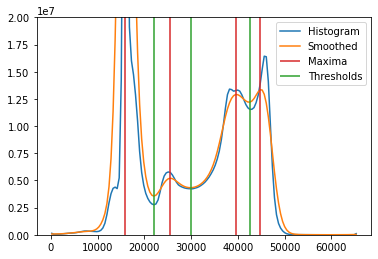

In [8]:
thresholds, fig, ax = segment.threshold_multi_min(
    imgs_res, nbins=150, nthresholds='all', return_fig_ax=True, ylims=[0, 2e7])
plt.show()

imgs_semantic = 0


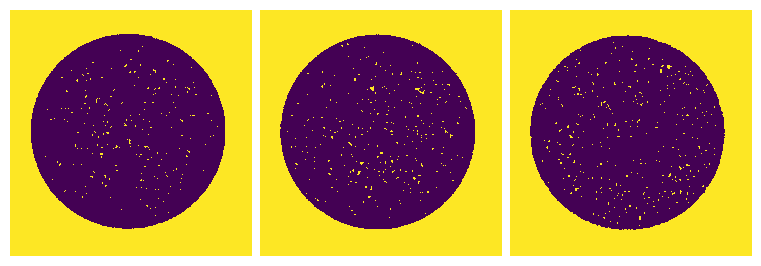

imgs_semantic = 1


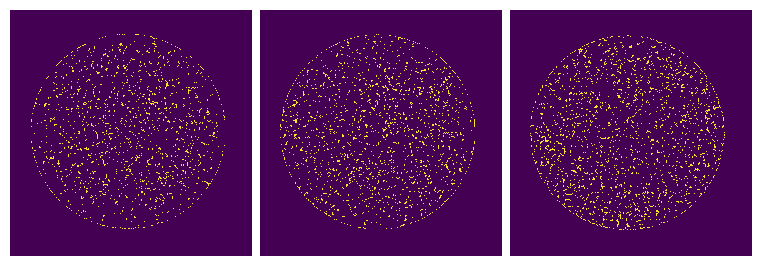

imgs_semantic = 2


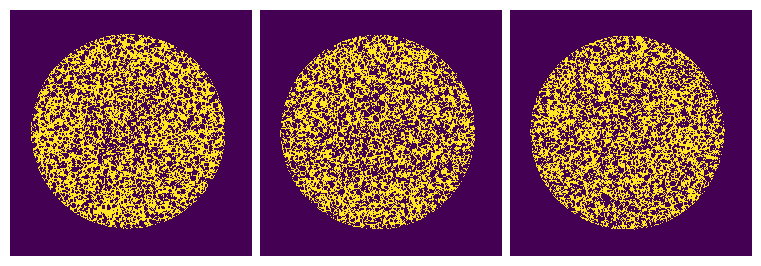

imgs_semantic = 3


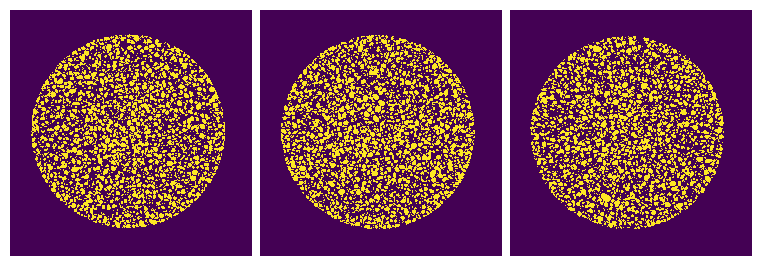

In [9]:
imgs_semantic = segment.isolate_classes(imgs_res, thresholds)
for i in range(len(thresholds) + 1):
    print('imgs_semantic =', i)
    fig, axes = view.plot_slices(
        imgs_semantic==i,
        slices=slices,
        print_slices=False,
        fig_w=7.5,
        dpi=100
    )
    plt.show()

Segmenting images...
--> Number of particle(s) before border exclusion:  80144
--> Excluding border particles...
--> Segmentation complete. 80135 particle(s) segmented.


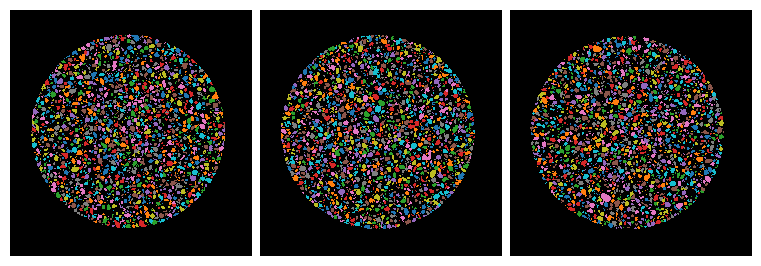

In [10]:
imgs = None
imgs_med = None
imgs_res = None
imgs_labeled = segment.watershed_segment(
    imgs_semantic==len(thresholds),
    min_peak_distance=6,
    exclude_borders=True,
    return_dict=False
)
fig, axes = view.plot_color_labels(
    imgs_labeled,
    slices=slices,
    fig_w=7.5,
    dpi=100
)